# Get the xyz frame of min energy

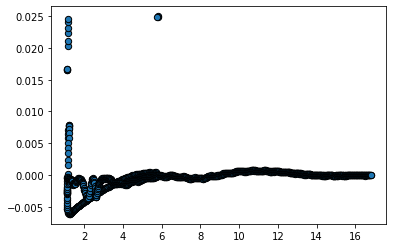

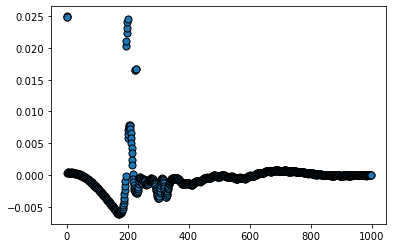

,index,energy,distance
172,174,-1987.563215,1.233848


In [5]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt


herr = herramientas()

path = "/home/antadlp/aot-jqkk-hfront/salida.out"
txt_2find = "Total DFT energy"

N = 72
au2aFactor = 0.5291771057875306

dic2 = {}
dic2["energy"] = {}
dic2["distance"] = {}

dfxyz = 0
idy = 0 # frames
f = open(path, 'r')
for line in f:
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = {}
        dic["ida"] = {}
        dic["atom"] = {}
        dic["x"] = {}
        dic["y"] = {}
        dic["z"] = {}
            
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            idx+=1
            
        dfxyz = pd.DataFrame(dic)

        # calculando distancia entre cabeza y CM de compuesto disparado
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[65:]).values # hasta donde abarca el aot-na
        # para agarrar solo la molecula de solvente, en este caso metanol
        vS = dfxyz[["x", "y", "z"]].loc[30].values  
        d = np.linalg.norm(cm_vMol - vS)
        dic2["distance"][idy] = float(d)

            
        
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
        idy+=1        


f.close() 

df = pd.DataFrame(dic2)
df = df.dropna()
df = df.reset_index()
df2 = df.copy()

refP = df2["energy"].iloc[-1]
d = df2["distance"].values
e = df2["energy"].values - refP

plt.scatter(d, e, s=40, edgecolors='black')
plt.show()

#############################

frames = df2.index.values
plt.scatter(frames, e, s=50, edgecolors='black')
plt.show()

df.loc[df[['energy']].idxmin()]
